In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/posts-csv/Posts.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import io
import plotly as pl
import plotly_express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/kaggle/input/posts-csv/Posts.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78926 entries, 0 to 78925
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     78926 non-null  int64  
 1   PostTypeId             78926 non-null  int64  
 2   CreationDate           78926 non-null  object 
 3   Score                  78926 non-null  int64  
 4   ViewCount              36775 non-null  float64
 5   Body                   78758 non-null  object 
 6   OwnerUserId            78448 non-null  float64
 7   LastActivityDate       78926 non-null  object 
 8   Title                  36775 non-null  object 
 9   Tags                   36775 non-null  object 
 10  AnswerCount            36775 non-null  float64
 11  CommentCount           78926 non-null  int64  
 12  ClosedDate             2246 non-null   object 
 13  ContentLicense         78926 non-null  object 
 14  AcceptedAnswerId       12190 non-null  float64
 15  La

In [5]:
df.head(5)

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,ClosedDate,ContentLicense,AcceptedAnswerId,LastEditorUserId,LastEditDate,ParentId,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName,FavoriteCount
0,5,1,2014/5/13 23:58,9,968.0,<p>I've always been interested in machine lear...,5.0,2014/5/14 0:36,How can I do simple machine learning without h...,|machine-learning|,...,2014/5/14 14:40,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,1,2014/5/14 0:11,4,510.0,"<p>As a researcher and instructor, I'm looking...",36.0,2014/5/16 13:45,What open-source books (or other materials) pr...,|education|open-source|,...,2014/5/14 8:40,CC BY-SA 3.0,10.0,97.0,2014/5/16 13:45,NaN,NaN,NaN,NaN,NaN
2,9,2,2014/5/14 0:36,5,NaN,"<p>Not sure if this fits the scope of this SE,...",51.0,2014/5/14 0:36,NaN,NaN,...,NaN,CC BY-SA 3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
3,10,2,2014/5/14 0:53,13,NaN,"<p>One book that's freely available is ""The El...",22.0,2014/5/14 0:53,NaN,NaN,...,NaN,CC BY-SA 3.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
4,14,1,2014/5/14 1:26,26,1931.0,<p>I am sure data science as will be discussed...,66.0,2020/8/16 13:01,Is Data Science the Same as Data Mining?,|data-mining|definitions|,...,NaN,CC BY-SA 3.0,29.0,322.0,2014/6/17 16:17,NaN,NaN,NaN,NaN,NaN


**Since my duty now is to get the top100 Posts sorted by CommentCount. There is no null value for the 11th column "CommentCount". I defined the top100 Posts sorted by CommentCount is "df_top100_comment"**

In [6]:
df_top100_comment = df.sort_values(by='CommentCount').head(100)
df_top100_comment

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,ClosedDate,ContentLicense,AcceptedAnswerId,LastEditorUserId,LastEditDate,ParentId,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName,FavoriteCount
39462,61569,1,2019/10/10 16:57,0,479.0,"<p>According to the documentation of fit(self,...",83560.0,2019/10/10 20:08,What is the use of fit method in sklearn.prepr...,|scikit-learn|normalization|,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46685,72252,1,2020/4/13 16:52,1,133.0,<p>I have read plenty of papers on link predic...,94769.0,2020/4/13 16:58,How to write a code on Link prediction on dyna...,|python|data-mining|networkx|,...,NaN,CC BY-SA 4.0,NaN,26019.0,2020/4/13 16:58,NaN,NaN,NaN,NaN,NaN
46687,72254,1,2020/4/13 17:23,1,22.0,<p>I have a classification problem where my in...,93553.0,2020/4/13 17:23,Which statistical method to use for feature se...,|machine-learning|scikit-learn|feature-selecti...,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46688,72256,2,2020/4/13 17:46,1,NaN,<p>There is a technique called Association Ana...,21468.0,2020/4/13 17:46,NaN,NaN,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,72121.0,NaN,NaN,NaN,NaN
46689,72257,1,2020/4/13 17:50,1,257.0,<p>I have a problem with regards to text class...,94780.0,2021/5/22 13:01,approach to classify text with natural languag...,|machine-learning|python|nlp|text-classification|,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46739,72345,2,2020/4/15 1:21,2,NaN,<p>It is completely acceptable if you make out...,49997.0,2020/4/15 1:21,NaN,NaN,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,72062.0,NaN,NaN,NaN,NaN
46740,72347,1,2020/4/15 2:54,2,1473.0,<p>Im new to deep learning and still learning ...,58933.0,2020/4/15 8:39,How to determine number of Neurons setup in Co...,|machine-learning|neural-network|deep-learning...,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46741,72348,1,2020/4/15 3:37,0,434.0,<p>I am trying to import a data frame into spa...,87652.0,2023/12/18 23:01,How to run Spark python code in Jupyter Notebo...,|python|bigdata|apache-spark|pyspark|data-engi...,...,NaN,CC BY-SA 4.0,NaN,98614.0,2020/7/11 22:03,NaN,NaN,NaN,NaN,NaN
46742,72351,1,2020/4/15 5:00,9,18837.0,<p>Whats causing the vanishing gradient or exp...,94320.0,2023/4/22 9:18,How to prevent vanishing gradient or exploding...,|gradient-descent|deep-learning|,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_top100_comment.to_csv('top100_comment.csv', index=False)

In [8]:
df_top100_comment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 39462 to 46743
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     100 non-null    int64  
 1   PostTypeId             100 non-null    int64  
 2   CreationDate           100 non-null    object 
 3   Score                  100 non-null    int64  
 4   ViewCount              57 non-null     float64
 5   Body                   100 non-null    object 
 6   OwnerUserId            100 non-null    float64
 7   LastActivityDate       100 non-null    object 
 8   Title                  57 non-null     object 
 9   Tags                   57 non-null     object 
 10  AnswerCount            57 non-null     float64
 11  CommentCount           100 non-null    int64  
 12  ClosedDate             3 non-null      object 
 13  ContentLicense         100 non-null    object 
 14  AcceptedAnswerId       13 non-null     float64
 15  LastE

In [9]:
df_top100_comment.head(10)

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,ClosedDate,ContentLicense,AcceptedAnswerId,LastEditorUserId,LastEditDate,ParentId,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName,FavoriteCount
39462,61569,1,2019/10/10 16:57,0,479.0,"<p>According to the documentation of fit(self,...",83560.0,2019/10/10 20:08,What is the use of fit method in sklearn.prepr...,|scikit-learn|normalization|,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46685,72252,1,2020/4/13 16:52,1,133.0,<p>I have read plenty of papers on link predic...,94769.0,2020/4/13 16:58,How to write a code on Link prediction on dyna...,|python|data-mining|networkx|,...,NaN,CC BY-SA 4.0,NaN,26019.0,2020/4/13 16:58,NaN,NaN,NaN,NaN,NaN
46687,72254,1,2020/4/13 17:23,1,22.0,<p>I have a classification problem where my in...,93553.0,2020/4/13 17:23,Which statistical method to use for feature se...,|machine-learning|scikit-learn|feature-selecti...,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46688,72256,2,2020/4/13 17:46,1,NaN,<p>There is a technique called Association Ana...,21468.0,2020/4/13 17:46,NaN,NaN,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,72121.0,NaN,NaN,NaN,NaN
46689,72257,1,2020/4/13 17:50,1,257.0,<p>I have a problem with regards to text class...,94780.0,2021/5/22 13:01,approach to classify text with natural languag...,|machine-learning|python|nlp|text-classification|,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46690,72258,2,2020/4/13 17:51,2,NaN,<h2>Why BN?</h2>\n\n<ol>\n<li>10x or more impr...,30838.0,2020/4/16 8:34,NaN,NaN,...,NaN,CC BY-SA 4.0,NaN,30838.0,2020/4/16 8:34,37889.0,NaN,NaN,NaN,NaN
46691,72259,1,2020/4/13 18:02,2,88.0,<p>In order to solve a Imbalanced Dataset Prob...,84696.0,2020/4/14 0:07,Random Forest Stacking Experiment for Imbalanc...,|scikit-learn|random-forest|boosting|bagging|,...,NaN,CC BY-SA 4.0,72277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46693,72265,2,2020/4/13 18:46,0,NaN,<p>We split the data into a training and test ...,94454.0,2020/4/13 19:04,NaN,NaN,...,NaN,CC BY-SA 4.0,NaN,94454.0,2020/4/13 19:04,72244.0,NaN,NaN,NaN,NaN
46694,72266,2,2020/4/13 19:22,0,NaN,<p>Just another way to do this when the report...,94785.0,2020/4/13 19:22,NaN,NaN,...,NaN,CC BY-SA 4.0,NaN,NaN,NaN,31134.0,NaN,NaN,NaN,NaN
46695,72267,2,2020/4/13 19:22,1,NaN,"<p>Hashing the unique copies of anything, incl...",1330.0,2020/5/15 13:52,NaN,NaN,...,NaN,CC BY-SA 4.0,NaN,1330.0,2020/5/15 13:52,61002.0,NaN,NaN,NaN,NaN


# We can found Structural missingness caused by different post types! So we need to classify the types of posts. So we need to divide the dataset into 2 subset.

In [10]:
questions = df[df["PostTypeId"] == 1].copy()
answers   = df[df["PostTypeId"] == 2].copy()

In [11]:
df['PostTypeId_clean'] = df['PostTypeId'].replace({
    1: 'Question',
    2: 'Answer',
    4: 'Other',
    5: 'Other',
    6: 'Other',
    7: 'Other'
})


In [12]:
type_counts = df['PostTypeId_clean'].value_counts()
print(type_counts)

PostTypeId_clean
Answer      41470
Question    36775
Other         681
Name: count, dtype: int64


In [13]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41470 entries, 2 to 78924
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     41470 non-null  int64  
 1   PostTypeId             41470 non-null  int64  
 2   CreationDate           41470 non-null  object 
 3   Score                  41470 non-null  int64  
 4   ViewCount              0 non-null      float64
 5   Body                   41470 non-null  object 
 6   OwnerUserId            41268 non-null  float64
 7   LastActivityDate       41470 non-null  object 
 8   Title                  0 non-null      object 
 9   Tags                   0 non-null      object 
 10  AnswerCount            0 non-null      float64
 11  CommentCount           41470 non-null  int64  
 12  ClosedDate             0 non-null      object 
 13  ContentLicense         41470 non-null  object 
 14  AcceptedAnswerId       0 non-null      float64
 15  LastEdi

In [14]:
answers_clean = answers[
    [
        "Id",
        "ParentId",
        "CreationDate",
        "LastActivityDate",
        "Score",
        "CommentCount",
        "Body",
        "OwnerUserId"
    ]
].copy()

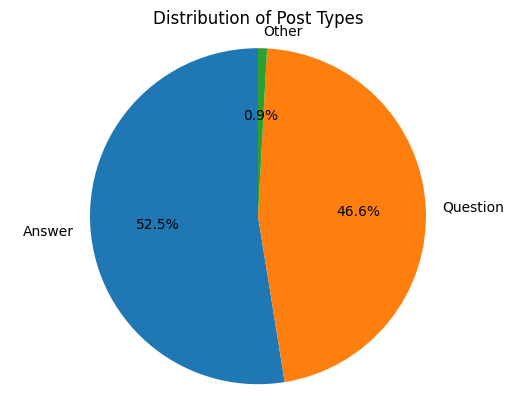

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Post Types')
plt.axis('equal')
plt.show()

Question Type Post Training

In [16]:
question_features = [
    "Id",
    "CreationDate",
    "LastActivityDate",
    "Score",
    "ViewCount",
    "AnswerCount",
    "CommentCount",
    "Title",
    "Body",
    "Tags",
    "OwnerUserId"
]

questions_clean = questions[question_features].copy()

In [17]:
questions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36775 entries, 0 to 78925
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                36775 non-null  int64  
 1   CreationDate      36775 non-null  object 
 2   LastActivityDate  36775 non-null  object 
 3   Score             36775 non-null  int64  
 4   ViewCount         36775 non-null  float64
 5   AnswerCount       36775 non-null  float64
 6   CommentCount      36775 non-null  int64  
 7   Title             36775 non-null  object 
 8   Body              36775 non-null  object 
 9   Tags              36775 non-null  object 
 10  OwnerUserId       36503 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.4+ MB


In [18]:
questions_clean["CreationDate"] = pd.to_datetime(questions_clean["CreationDate"])
questions_clean["LastActivityDate"] = pd.to_datetime(questions_clean["LastActivityDate"])
questions_clean["active_days"] = (
    questions_clean["LastActivityDate"] - questions_clean["CreationDate"]
).dt.days+1
questions_clean["active_days"].describe()

count    36775.000000
mean       287.029558
std        540.547838
min          1.000000
25%          1.000000
50%          2.000000
75%        310.000000
max       3477.000000
Name: active_days, dtype: float64

In [19]:
num_features = [
    "active_days",
    "ViewCount",
    "AnswerCount",
    "CommentCount",
    "Score"
]

questions_number_features = questions_clean[num_features]

In [20]:
questions_number_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36775 entries, 0 to 78925
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   active_days   36775 non-null  int64  
 1   ViewCount     36775 non-null  float64
 2   AnswerCount   36775 non-null  float64
 3   CommentCount  36775 non-null  int64  
 4   Score         36775 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.7 MB


In [21]:
feature_cols = [
    "active_days",
    "ViewCount",
    "AnswerCount",
    "CommentCount"
]

X = questions_clean[feature_cols]
y = questions_clean["Score"]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [23]:
X_train_log = X_train.copy()
X_test_log = X_test.copy()

for col in ["ViewCount", "AnswerCount", "CommentCount"]:
    X_train_log[col] = np.log1p(X_train_log[col])
    X_test_log[col] = np.log1p(X_test_log[col])

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_log, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_log)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(2.269275855201609, 26.588664194323925, 0.2054422587563567)

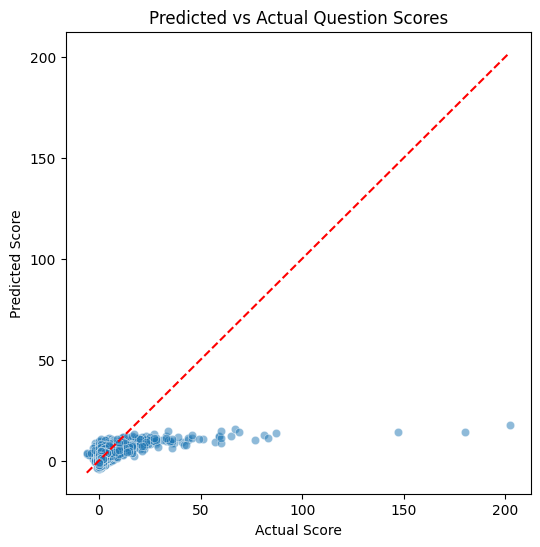

In [26]:
y_pred = model.predict(X_test_log)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Question Scores")
plt.show()

Unlinear Model

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train_log, y_train)
y_pred_rf = rf.predict(X_test_log)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


MAE: 1.413
RMSE: 3.138
R²: 0.706


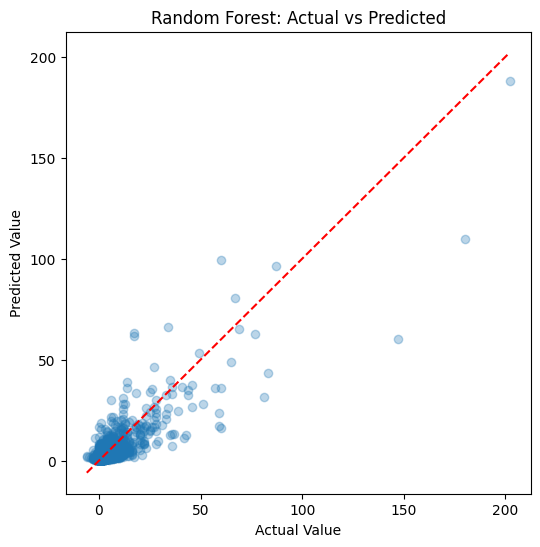

In [29]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


Due to the heavy-tailed nature of StackExchange data, the Random Forest model tends to underpredict extremely high values, which is a known limitation of tree-based ensemble regressors. Nevertheless, the model captures meaningful non-linear relationships and provides interpretable feature importance for understanding question popularity.

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gbr.fit(X_train_log, y_train)
y_pred_gbr = gbr.predict(X_test_log)

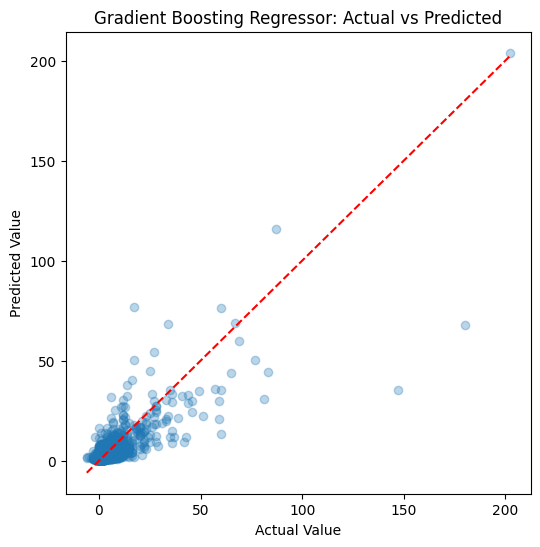

In [31]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Gradient Boosting Regressor: Actual vs Predicted")
plt.show()

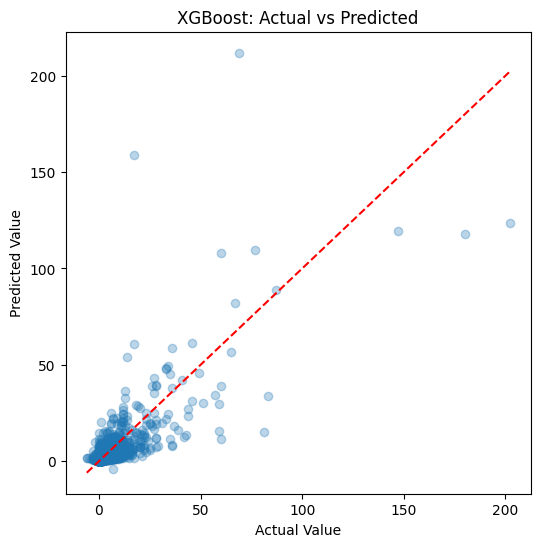

In [32]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_log, y_train)
y_pred_xgb = xgb.predict(X_test_log)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("XGBoost: Actual vs Predicted")
plt.show()

Among the evaluated models, Gradient Boosting Regressor achieved the best balance between accuracy and stability, while XGBoost demonstrated superior performance in capturing high-scoring questions.
This confirms that question popularity on StackExchange is driven by complex non-linear interactions, and boosting-based models are particularly effective for this task.

In [33]:
feature_importance = pd.Series(
    gbr.feature_importances_,
    index=X_train_log.columns
).sort_values(ascending=False)

feature_importance.head(10)


ViewCount       0.725686
active_days     0.117716
AnswerCount     0.096793
CommentCount    0.059804
dtype: float64

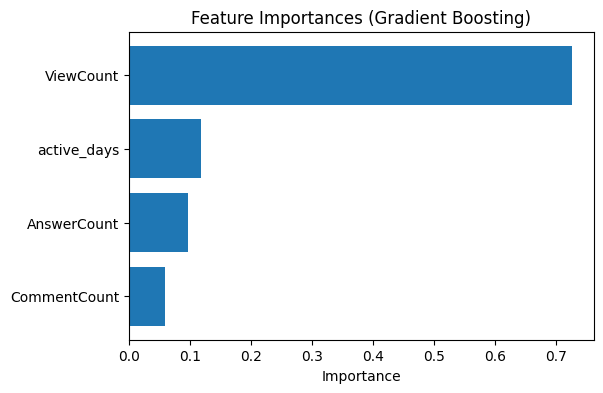

In [34]:
top_n = 4
fi_top = feature_importance.head(top_n)

plt.figure(figsize=(6, 4))
plt.barh(fi_top.index[::-1], fi_top.values[::-1])
plt.xlabel("Importance")
plt.title("Feature Importances (Gradient Boosting)")
plt.show()

Feature importance analysis shows that ViewCount is the dominant factor in predicting question scores, which aligns with the platform’s exposure-driven feedback mechanism.
Temporal engagement features such as active days and answer count also contribute meaningfully, indicating that sustained community interaction plays an important role in question popularity.
It is important to note that these features reflect post-publication dynamics and are therefore more suitable for explanatory analysis rather than early-stage prediction.